In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
##                                           **********  things we do in eda *********************************   
#                                                          1.check for null values
#                                                          2.explore about numerical variable
#                                                          3.explore about categorical variables
#                                                          4.check for relationships 

In [4]:
df = pd.read_csv("zomato.csv", encoding='Latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
[features for features in df.columns if df[features].isnull().sum() > 0]

['Cuisines']

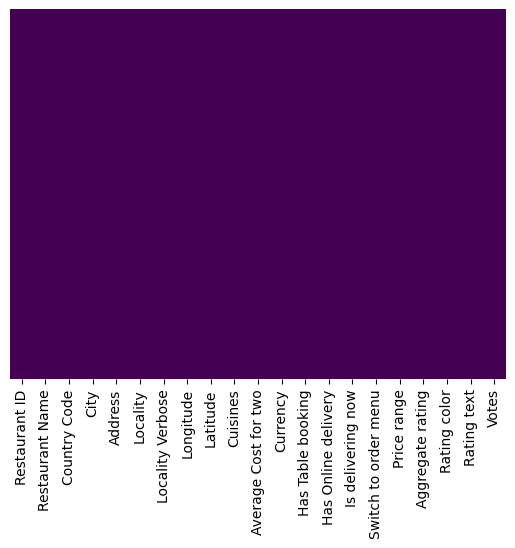

In [8]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [9]:
df_country = pd.read_excel("country-code.xlsx")
df_country.columns

Index(['Country Code', 'Country'], dtype='object')

In [10]:
final_df = pd.merge(df, df_country, on="Country Code", how='left')
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [11]:
country_names = final_df.Country.value_counts().index
print(country_names)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')


In [12]:
country_val = final_df.Country.value_counts().values

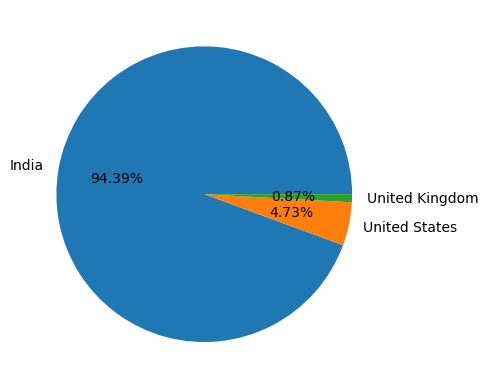

In [13]:
# highest usage of zomato in what country using pie chart
plt.pie(x= country_val[:3], labels= country_names[:3], autopct="%1.2f%%")
plt.show()

In [14]:
ratings = final_df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns={0:'Rating count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


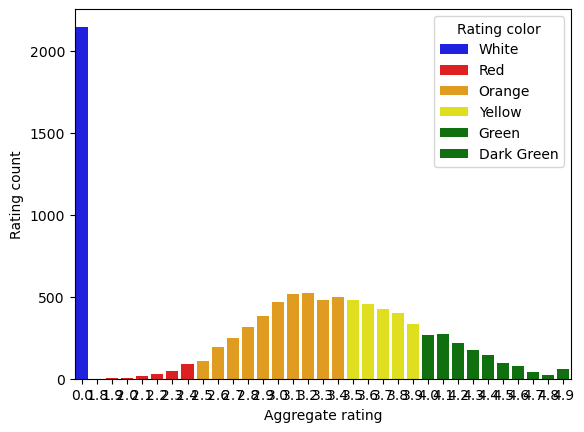

In [15]:
sns.barplot(x='Aggregate rating', y='Rating count', hue='Rating color', data= ratings, palette=['blue','red','orange','yellow','green','green'])
plt.show()

C:\Users\Home\AppData\Local\Temp\ipykernel_1676\779404601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])


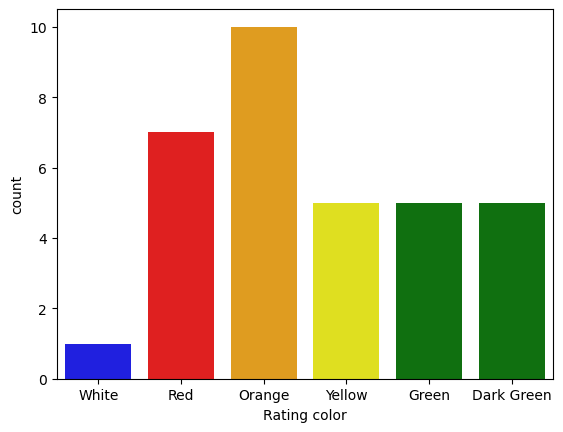

In [16]:
#count plot
sns.countplot(x='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])
plt.show()

In [17]:
final_df[final_df['Rating color']=='White'].groupby('Country').size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [18]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [19]:
final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [20]:
final_df[final_df["Has Online delivery"] == "Yes"].Country.value_counts()

Country
India    2423
UAE        28
Name: count, dtype: int64

In [23]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index
city_labels


Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Lucknow', 'Ahmedabad', 'Amritsar', 'Guwahati',
       ...
       'Forrest', 'East Ballina', 'Huskisson', 'Inverloch', 'Lakeview',
       'Lakes Entrance', 'Mohali', 'Panchkula', 'Bandung', 'Randburg'],
      dtype='object', name='City', length=141)

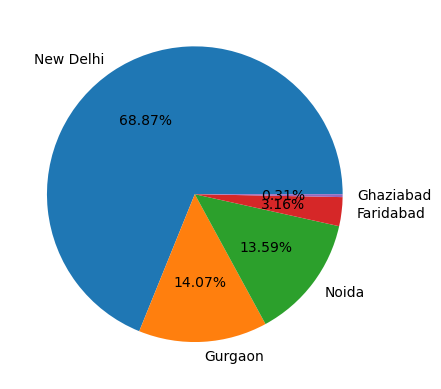

In [27]:
plt.pie(city_values[:5], labels=city_labels[:5], autopct='%1.2f%%')
plt.show()

In [28]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [32]:
ten_cuisines = final_df[['Restaurant Name', 'Cuisines']].groupby(['Restaurant Name', 'Cuisines']).size().reset_index(name='Count')

In [33]:
ten_cuisines = ten_cuisines.sort_values(by="Count", ascending=False)

In [34]:
ten_cuisines.head(10)

,Restaurant Name,Cuisines,Count
1210,Cafe Coffee Day,Cafe,83
2275,Domino's Pizza,"Pizza, Fast Food",78
6535,Subway,"American, Fast Food, Salad, Healthy Food",62
2924,Green Chick Chop,"Raw Meats, North Indian, Fast Food",47
4356,McDonald's,"Fast Food, Burger",44
3734,Keventers,Beverages,34
2820,Giani,"Ice Cream, Desserts",29
750,Baskin Robbins,Ice Cream,28
2821,Giani's,"Ice Cream, Desserts",22
2324,Dunkin' Donuts,"Burger, Desserts, Fast Food",22


In [36]:
cuisines_values = ten_cuisines.value_counts().values
cuisines_labels = ten_cuisines.value_counts().index

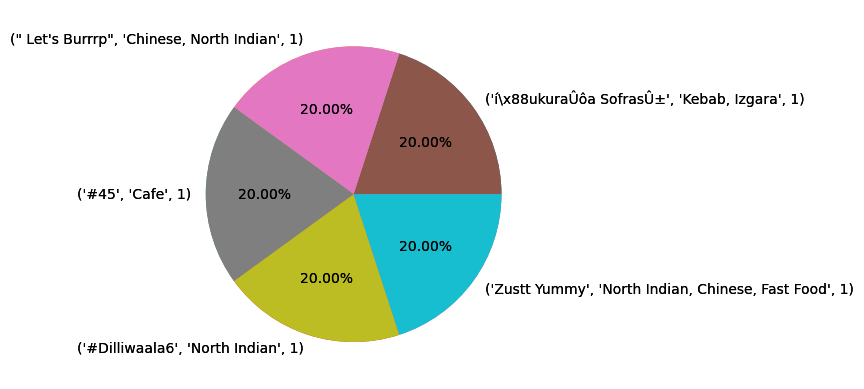

In [38]:
plt.pie(cuisines_values[:5], labels=cuisines_labels[:5], autopct='%1.2f%%')
plt.show()